## Описание данных
#### Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана
#### Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок
#### Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение
#### Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
#### Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

----

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)
import math

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Датафрейм calls

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.isna().sum()/calls.shape[0]

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [5]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


### Датафрейм internet

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [7]:
internet.isna().sum()/internet.shape[0]

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [8]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Датафрейм messages

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
messages.isna().sum()/messages.shape[0]

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

In [11]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


### Датафрейм tariffs

In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


In [13]:
tariffs.isna().sum()/tariffs.shape[0]

messages_included        0.0
mg_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

In [14]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Датафрейм users

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


In [16]:
users.isna().sum()/users.shape[0]

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


-----

----

----

# Шаг 2. Подготовьте данные

## Подготовим датафрейм final_df, в котором будем собирать все данные
1. Создадим пустой датафрейм, в котором будут строки для 12 месяцев по каждому юзер айди

In [18]:
temp_df = pd.DataFrame({'month': range(1,13),'fake_index':0})

In [19]:
#добавим временный индекс, чтобы объединить пустой датафрейм с таблицей юзеров
users['fake_index'] = 0

In [20]:
final_df = temp_df.merge(users, how='outer', on='fake_index')

### Проверим, что по каждому юзер_айди есть строки за 12 месяцев. 

In [21]:
final_df.shape[0]/12 == users.shape[0]

True

### Уберем временный столбец fake_index

In [22]:
final_df.drop(['fake_index'], axis =1, inplace = True)

### Посмотрим что получилось

In [23]:
final_df.sort_values(['user_id','month']).head(12)

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
500,2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1500,4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2000,5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2500,6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3000,7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3500,8,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4000,9,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4500,10,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


-----

## Датафрейм internet

In [24]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [25]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [26]:
#Поменяем тип данных user_id на int16
internet['user_id'] = internet['user_id'].astype('int16')

In [27]:
#Выделим месяц в отдельный столбец для группировки и поменяем тип на datetime
internet['month'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month.astype('int16')

### Округлим значения потраченных мегабайтов в большую сторону до 1 мб, в соответствии с условием

In [28]:
internet['mb_used'] = np.ceil(internet['mb_used'])

### Подготовим датафрейм для сбора финального датафрейма, посчитаем количество использованных мб на каждого юзер_айди в каждом месяце

In [29]:
internet_grouped = internet\
                            .groupby(['user_id','month'])\
                            .agg({'mb_used':'sum'})\
                            .reset_index()

In [30]:
internet_grouped.head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


### Присоединим расчитанные статистики в датафрейм для накопления данных

In [31]:
final_df = final_df.merge(internet_grouped, on=['user_id','month'], how='left')

In [32]:
final_df.head(12)

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used
0,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN
1,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN
2,1,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN
3,1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN
4,1,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN
5,1,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2730.0
6,1,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN
7,1,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,NaN
8,1,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,NaN
9,1,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,NaN


### В датафрейме присутствуют NaN значения по тем месяцам, где не было расхода интернета, избавимся от них в самом конце, когда все необходимые расчитанные стастистики будут присоединены к final_df

----

## Датафрейм messages

In [33]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [34]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [35]:
#Поменяем тип данных на int16
messages['user_id'] = messages['user_id'].astype('int16')

In [36]:
#Выделим месяц в отдельный столбец для группировки и переведем в формат datetime
messages['month'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d').dt.month.astype('int16')

### Посчитаем количество сообщений по каждому юзер_айди в каждом месяце

In [37]:
messages_grouped = messages\
                            .groupby(['user_id','month'])\
                            .agg({'id':'count'})\
                            .reset_index()\
                            .rename(columns={'id':'message_count'})

In [38]:
messages_grouped.head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Добавим в final_df посчитанное количество сообщений для каждого юзер_айди в каждом месяце

In [39]:
final_df = final_df.merge(messages_grouped, on=['user_id','month'], how='left')

In [40]:
final_df.head(12)

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count
0,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN
1,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN
2,1,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN
3,1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN
4,1,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN
5,1,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2730.0,7.0
6,1,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN,NaN
7,1,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,NaN,NaN
8,1,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,NaN,NaN
9,1,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,NaN,NaN


----

## Датафрейм calls

In [41]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


### Округлим значения потраченных минут в большую сторону до 1 минуты

In [42]:
calls['duration'] = np.ceil(calls['duration'])

In [43]:
#Выделим месяц для последующей группировки и переведем в datetime
calls['month'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d').dt.month

### Посчитаем количество звонков и количество потраченных минут на каждого юзер_айди в каждом месяце.
* Звонки с нулевой длительностью __не выкидываем__, тк это сигнал о том что пользователь продолжает пользоваться тарифом и оплачивает абонентскую плату
* 
* __Предположения, что это может быть:__
* 
1. проверки баланса (позвонил и пришла смс)
2. звонки на номера, которые заняты
3. подключения к интернету (как модем)

In [44]:
calls_grouped = calls\
                    .groupby(['month','user_id'])\
                    .agg({'id':'count','duration':'sum'})\
                    .reset_index()\
                    .rename(columns = {'id':'call_count','duration':'call_duration'})

In [45]:
calls_grouped.shape

(3174, 4)

In [46]:
calls_grouped.head()

,month,user_id,call_count,call_duration
0,1,1005,15,95.0
1,1,1032,61,380.0
2,1,1045,1,9.0
3,1,1055,64,551.0
4,1,1071,24,194.0


### Добавим в final_df посчитанное количество звонков и суммарную длительность для каждого юзер_айди в каждом месяце

In [47]:
final_df = final_df.merge(calls_grouped, on=['user_id','month'], how='left') 

In [48]:
final_df.head(12)

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count,call_count,call_duration
0,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,NaN,NaN
1,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,NaN,NaN
2,1,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,NaN,NaN
3,1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,NaN,NaN
4,1,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,NaN,NaN
5,1,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2730.0,7.0,15.0,95.0
6,1,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN,NaN,NaN,NaN
7,1,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,NaN,NaN,NaN,NaN
8,1,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,NaN,NaN,NaN,NaN
9,1,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,NaN,NaN,NaN,NaN


## Датафрейм tariffs

In [49]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


### Для последующего добавления в final_df переименуем ключ, колонку tariff 

In [50]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [51]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Добавим информацию о тарифе в финальный датафрейм

In [52]:
final_df = final_df.merge(tariffs, on='tariff', how='outer')

In [53]:
final_df.head(12)

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count,call_count,call_duration,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
1,1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2,1,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
3,1,1013,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
4,1,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
5,1,1018,71,NaN,Уфа,Матвей,Золотов,2018-04-01,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
6,1,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
7,1,1021,61,NaN,Краснодар,Святослав,Тихонов,2018-04-26,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
8,1,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
9,1,1028,20,NaN,Тверь,Рустем,Евсеев,2018-10-02,ultra,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1


-----
-----

## Датафрейм final_df

### NaN на месте mb_used, message_count, call_count, call_duration одновременно, означает что в этот месяц  пользователь не проявлял активность, но должен оплатить нам абонентскую плату.

### Но тк мы собирали данные в искуственно созданном датафрейме, нам необходимо удалить все строки, где  месяц_оттока < месяц < месяц_регистрации

### Заменим NaN значения в оттоке на максимальную дату в 2018 году (31 декабря 2018)

In [54]:
#Заполнил NaN значения в оттоке последним днем 2018 года
final_df['churn_date'].fillna('2018-12-31', inplace=True)

### Переведем в формат datettime reg_date и churn_date

In [55]:
final_df['churn_date'] = pd.to_datetime(final_df['churn_date'], format='%Y-%m-%d')
final_df['reg_date'] = pd.to_datetime(final_df['reg_date'], format='%Y-%m-%d')

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 20 columns):
month                    6000 non-null int64
user_id                  6000 non-null int64
age                      6000 non-null int64
churn_date               6000 non-null datetime64[ns]
city                     6000 non-null object
first_name               6000 non-null object
last_name                6000 non-null object
reg_date                 6000 non-null datetime64[ns]
tariff                   6000 non-null object
mb_used                  3203 non-null float64
message_count            2717 non-null float64
call_count               3174 non-null float64
call_duration            3174 non-null float64
messages_included        6000 non-null int64
mg_per_month_included    6000 non-null int64
minutes_included         6000 non-null int64
rub_monthly_fee          6000 non-null int64
rub_per_gb               6000 non-null int64
rub_per_message          6000 non-null int64
rub_per_

### Выделим месяц оттока и месяц регистрации
* удалим строки в которых искуственно созданный месяц больше, чем месяц оттока и строки, где месяц меньше, чем месяц регистрации

In [57]:
final_df['churn_month'] = final_df['churn_date'].dt.month
final_df['reg_month'] = final_df['reg_date'].dt.month

In [58]:
final_df.shape[0]

6000

In [59]:
final_df = final_df.query('month <= churn_month & month >= reg_month')

In [60]:
final_df.shape[0]

3216

In [61]:
final_df.head()

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count,call_count,call_duration,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,churn_month,reg_month
32,1,1120,25,2018-12-31,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,657.0,NaN,5.0,55.0,1000,30720,3000,1950,150,1,1,12,1
35,1,1126,71,2018-12-31,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,16377.0,4.0,35.0,272.0,1000,30720,3000,1950,150,1,1,12,1
46,1,1168,28,2018-12-31,Кострома,Лилия,Ананьева,2018-01-24,ultra,8161.0,14.0,38.0,277.0,1000,30720,3000,1950,150,1,1,12,1
65,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,19707.0,NaN,59.0,466.0,1000,30720,3000,1950,150,1,1,8,1
109,1,1375,53,2018-12-31,Пенза,Мария,Акимычева,2018-01-04,ultra,14563.0,75.0,126.0,852.0,1000,30720,3000,1950,150,1,1,12,1


### Теперь, когда мы оставили только необходимые строки, мы можем заменить NaN значения на 0 в колонках mb_used, message_count, call_count, call_duration.

In [62]:
final_df = final_df.fillna(0)

### Все ок

In [63]:
final_df.isna().sum()

month                    0
user_id                  0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
mb_used                  0
message_count            0
call_count               0
call_duration            0
messages_included        0
mg_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
churn_month              0
reg_month                0
dtype: int64

### Поменяем типы данных в mb_used, message_count, call_count, call_duration на integer

In [64]:
for col in ['mb_used', 'message_count', 'call_count', 'call_duration']:
    final_df[col] = final_df[col].astype('int')

### Найдем суммарный доход с каждого пользователя в каждом месяце
* Для этого сложим абонентскую плату по тарифу с оплатой за выход по лимитам в каждом тарифе

### Напишем функцию, которая считает перерасход

In [65]:
def overspend(x):
        messages = (x.message_count - x.messages_included)*x.rub_per_message
        minutes = (x.call_duration - x.minutes_included)*x.rub_per_minute
        mb = (x.mb_used - x.mg_per_month_included)*x.rub_per_gb/1000
        total = 0
        for i in [messages, minutes, mb]:
            if i>0:
                total += i
        return total

### Запишем сумму перарасхода в final_df

In [66]:
final_df['over_spend'] = final_df.apply(lambda x: overspend(x), axis=1)

### Посчитаем суммарный расход на кажого пользователя для каждого месяца
* Сложим перетрату с абонентской платой по тарифу

In [67]:
final_df['total_spend'] = final_df['rub_monthly_fee']+final_df['over_spend']

In [68]:
final_df.sort_values('total_spend', ascending=False).head()

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count,call_count,call_duration,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,churn_month,reg_month,over_spend,total_spend
5989,12,1486,35,2018-12-31,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,38610,83,133,1007,50,15360,500,550,200,3,3,12,10,6270.0,6820.0
5841,12,1261,46,2018-12-31,Казань,Мадина,Пантелеева,2018-10-30,smart,32697,22,141,1074,50,15360,500,550,200,3,3,12,10,5189.4,5739.4
5680,12,1042,42,2018-12-31,Хабаровск,Константин,Добрынин,2018-11-25,smart,37219,75,121,728,50,15360,500,550,200,3,3,12,11,5130.8,5680.8
5638,11,1486,35,2018-12-31,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,36319,96,108,764,50,15360,500,550,200,3,3,12,10,5121.8,5671.8
5858,12,1286,19,2018-12-31,Москва,Рашид,Троицкий,2018-11-27,smart,35151,68,95,739,50,15360,500,550,200,3,3,12,11,4729.2,5279.2


### Построим графики box-plot по расходам сверх лимита в зависимости от тарифа (смарт/ультра)

In [69]:
final_df.boxplot('over_spend', by='tariff', figsize=(10,8))

### На первый взгляд смарт хоть и дешевле, но выбросов в нем больше, возможно он выгоднее для оператора. Необходимо избавиться от выбросов.

---

## Избавимся от выбросов
* Чтобы избавиться от выбросов пройдемся по столбцам __message_count, mb_used, call_duration__ и удалим все что ниже и выше 1,5*IQR
* Удалять выбросы будем отдельно по каждому столбцу внутри каждого тарифа
* Воспользуюсь уже написанной функцией из прошлого проекта

In [70]:
def delete_outliers(df, column,graphic=0,x=8,y=8):
    # Посчитаем первый и третий квантиль
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    # Посчитаем межквартильный размах
    iqr = q3 - q1
    # Отфильтруем по условию
    filter = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filter].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filter]

## Удалим выбросы отдельно для тарифа смарт и ультра
* Создадим датафрейм df without outliers, сокращенно: df_wo отдельно для каждого тарифа

In [71]:
#Отфильтруем смарт и удалим выбросы
df_wo_smart = final_df[final_df['tariff']=='smart']
df_wo_smart = delete_outliers(df_wo_smart,'message_count',0)
for feature in ['mb_used','call_duration']:
    df_wo_smart = delete_outliers(df_wo_smart,feature,0)

In [72]:
print("Удалено", final_df.query('tariff == "smart"').shape[0] - df_wo_smart.shape[0], "выброcов для тарифа smart")

Удалено 61 выброcов для тарифа smart


In [73]:
#Отфильтруем ультру и удалим выбросы
df_wo_ultra = final_df[final_df['tariff']=='ultra']
df_wo_ultra = delete_outliers(df_wo_ultra,'message_count',0)
for feature in ['mb_used','call_duration']:
    df_wo_ultra = delete_outliers(df_wo_ultra,feature,0)

In [74]:
print("Удалено", final_df.query('tariff == "ultra"').shape[0] - df_wo_ultra.shape[0], "выброcов для тарифа ultra")

Удалено 12 выброcов для тарифа ultra


## Объединим обратно данные без выбросов в единый датафрейм final_df_wo

In [75]:
final_df_wo = pd.concat([df_wo_ultra,df_wo_smart])

In [76]:
final_df_wo.head()

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count,call_count,call_duration,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,churn_month,reg_month,over_spend,total_spend
32,1,1120,25,2018-12-31,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,657,0,5,55,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0
35,1,1126,71,2018-12-31,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,16377,4,35,272,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0
46,1,1168,28,2018-12-31,Кострома,Лилия,Ананьева,2018-01-24,ultra,8161,14,38,277,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0
65,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,19707,0,59,466,1000,30720,3000,1950,150,1,1,8,1,0.0,1950.0
109,1,1375,53,2018-12-31,Пенза,Мария,Акимычева,2018-01-04,ultra,14563,75,126,852,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0


In [77]:
final_df_wo.shape[0]

3143

----

----

# Шаг 3. Проанализируйте данные
* Опишите поведение клиентов оператора, исходя из выборки. 
* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
* Посчитайте среднее количество, дисперсию и стандартное отклонение. 
* Постройте гистограммы.
* Опишите распределения.

In [78]:
# features = ['call_duration','message_count','mb_used']
# for feature in features:
#     plot = final_df_wo.boxplot(feature, by='tariff', figsize=(14,6))

## Определим количество минут которое требуется пользователям тарифа smart и ultra

Text(0.5, 1.0, 'Гистограмма длительности звонков в тарифе ultra')

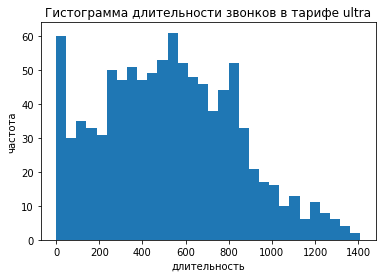

In [79]:
#Вначале посмотрим на гистограмму, чтобы понять какого вида у нас распределения и 
#какую меру центральной тенденции мы можем использовать для характеристики распределения (mean/median)
import matplotlib.pyplot as plt
final_df_wo[final_df_wo['tariff']=='ultra']['call_duration'].plot(kind='hist', bins=30)
plt.xlabel('длительность')
plt.ylabel('частота')
plt.title('Гистограмма длительности звонков в тарифе ultra')

Text(0.5, 1.0, 'Гистограмма длительности звонков в тарифе smart')

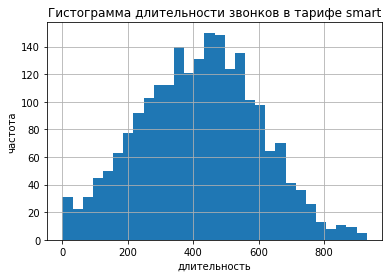

In [80]:
final_df_wo[final_df_wo['tariff']=='smart']['call_duration'].hist(bins=30)
plt.xlabel('длительность')
plt.ylabel('частота')
plt.title('Гистограмма длительности звонков в тарифе smart')

### Т.к. распределение для тарифа ultra не симметрично, лучше использовать для оценки медиану.


### Построим графики боксплот
* __Не могу убрать здесь вывод [<matplotlib.axis.YTick at 0x7f8d82e4c160> etc] при указании параметров шага сетки__

Text(0.5, 1.0, 'Графики box-plot по длительности звонков для тарифов smart и ultra')

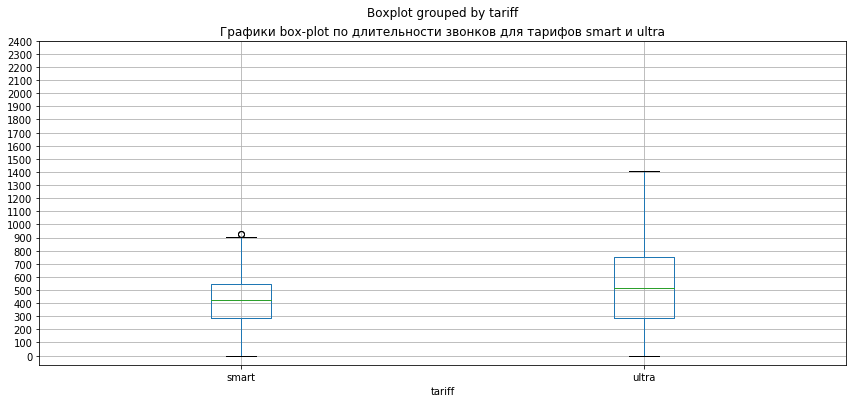

In [81]:
plot = final_df_wo.boxplot('call_duration', by='tariff', figsize=(14,6))
plot.set_yticks(range(0, 2500, 100))
plt.title('Графики box-plot по длительности звонков для тарифов smart и ultra')

### Рассчитаем медиану, среднее, дисперсию и стандартное отклонение

In [82]:
final_df_wo\
    .groupby('tariff')\
    .agg({'call_duration':['median','mean','var','std']})\
    .style.format("{:.2f}")

## Вывод: Пользователям тарифа smart обычно требуется 421 мин/месяц, а пользователям тарифа ultra 518 мин/месяц

----
----

## Определим количество сообщений которое требуется пользователям тарифа smart и ultra

Text(0.5, 1.0, 'Гистограмма количества сообщений в тарифе ultra')

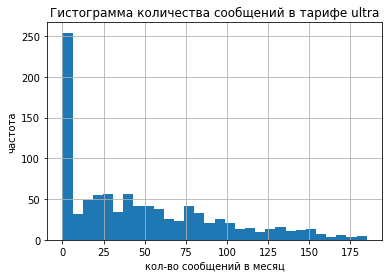

In [83]:
final_df_wo[final_df_wo['tariff']=='ultra']['message_count'].hist(bins=30)
plt.xlabel('кол-во сообщений в месяц')
plt.ylabel('частота')
plt.title('Гистограмма количества сообщений в тарифе ultra')

Text(0.5, 1.0, 'Гистограмма количества сообщений в тарифе smart')

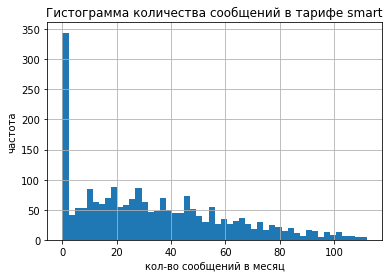

In [84]:
final_df_wo[final_df_wo['tariff']=='smart']['message_count'].hist(bins=50)
plt.xlabel('кол-во сообщений в месяц')
plt.ylabel('частота')
plt.title('Гистограмма количества сообщений в тарифе smart')

### Т.к. распределения не симметричны, будем использовать для оценки медиану. 

In [85]:
final_df_wo[final_df_wo['tariff']=='ultra']['message_count'].mean()

47.87166324435318

In [86]:
final_df_wo[final_df_wo['tariff']=='ultra']['message_count'].median()

37.0

### Построим графики боксплот

Text(0.5, 1.0, 'Графики box-plot по количеству сообщений/мес для тарифов smart и ultra')

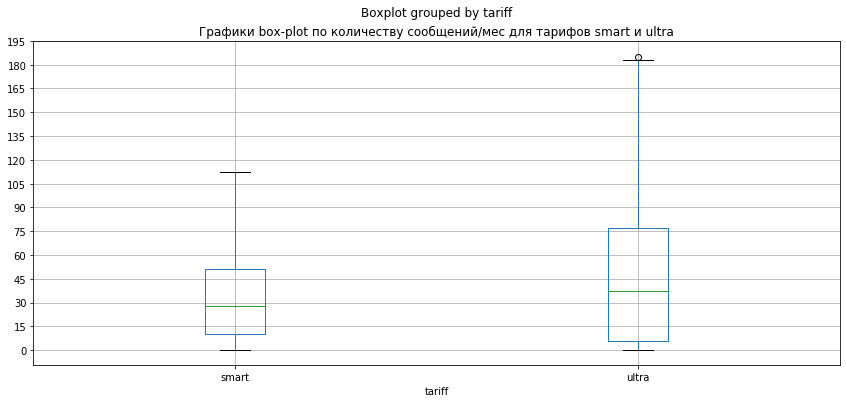

In [87]:
plot = final_df_wo.boxplot('message_count', by='tariff', figsize=(14,6))
plot.set_yticks(range(0,200,15))
plt.title('Графики box-plot по количеству сообщений/мес для тарифов smart и ultra')

### Рассчитаем медиану, среднее, дисперсию и стандартное отклонение

In [88]:
final_df_wo\
    .groupby('tariff')\
    .agg({'message_count':['median','mean','var','std']})\
    .style.format("{:.2f}")

## Вывод: Пользователям тарифа smart обычно требуется 28 сообщений/месяц, а пользователям тарифа ultra 37 сообщений/месяц

----
----

## Определим количество трафика, которое требуется пользователям тарифа smart и ultra

Text(0.5, 1.0, 'Гистограмма потраченных мб в тарифе ultra')

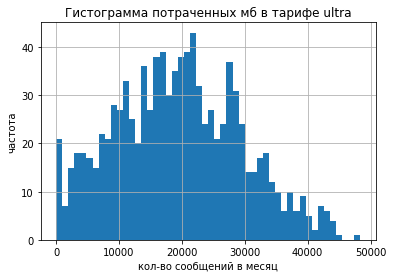

In [89]:
final_df_wo[final_df_wo['tariff']=='ultra']['mb_used'].hist(bins=50)
plt.xlabel('кол-во сообщений в месяц')
plt.ylabel('частота')
plt.title('Гистограмма потраченных мб в тарифе ultra')

Text(0.5, 1.0, 'Гистограмма потраченных мб в тарифе smart')

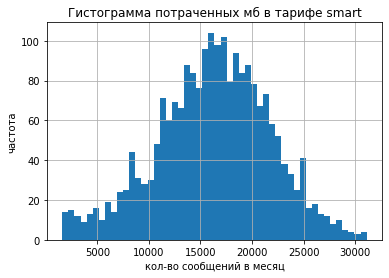

In [90]:
final_df_wo[final_df_wo['tariff']=='smart']['mb_used'].hist(bins=50)
plt.xlabel('кол-во сообщений в месяц')
plt.ylabel('частота')
plt.title('Гистограмма потраченных мб в тарифе smart')

In [91]:
final_df_wo[final_df_wo['tariff']=='ultra']['mb_used'].median()

19264.0

In [92]:
final_df_wo[final_df_wo['tariff']=='ultra']['mb_used'].mean()

19363.362422997947

### Построим графики боксплот

Text(0.5, 1.0, 'Графики box-plot для кол-ва использованных мб/мес для тарифов smart и ultra')

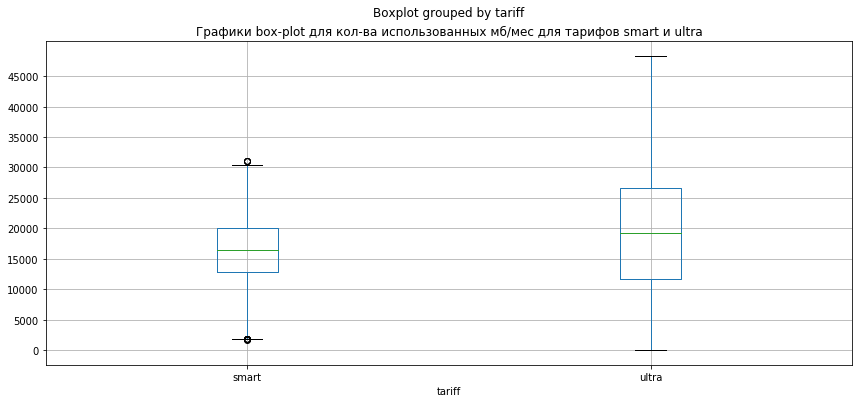

In [93]:
plot = final_df_wo.boxplot('mb_used', by='tariff', figsize=(14,6))
plot.set_yticks(range(0,50000,5000))
plt.title('Графики box-plot для кол-ва использованных мб/мес для тарифов smart и ultra')

### Рассчитаем медиану, среднее, дисперсию и стандартное отклонение

In [94]:
final_df_wo\
    .groupby('tariff')\
    .agg({'mb_used':['median','mean','var','std']})\
    .style.format("{:.2f}")

## Вывод: Пользователям тарифа smart обычно требуется 16,5 гб/месяц, а пользователям тарифа ultra 19,2 гб/месяц. Разброс значений выше у пользователей тарифа ultra

-----


----

# Шаг 4. Проверьте гипотезы
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
3. Пороговое значение alpha задайте самостоятельно.
### Поясните
4. как вы формулировали нулевую и альтернативную гипотезы;
5. какой критерий использовали для проверки гипотез и почему.

In [95]:
final_df_wo.head()

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mb_used,message_count,call_count,call_duration,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,churn_month,reg_month,over_spend,total_spend
32,1,1120,25,2018-12-31,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,657,0,5,55,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0
35,1,1126,71,2018-12-31,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,16377,4,35,272,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0
46,1,1168,28,2018-12-31,Кострома,Лилия,Ананьева,2018-01-24,ultra,8161,14,38,277,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0
65,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,19707,0,59,466,1000,30720,3000,1950,150,1,1,8,1,0.0,1950.0
109,1,1375,53,2018-12-31,Пенза,Мария,Акимычева,2018-01-04,ultra,14563,75,126,852,1000,30720,3000,1950,150,1,1,12,1,0.0,1950.0


## Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* Выручка по каждому юзер айди в каждом месяце рассчитана в колонке total_spend
* Проверим какие распределения по этому массиву у тарифа смарт и ультра
* Построим QQPlot или посчитаем критерий Шапиро-Уилка, чтобы понять нормальны ли распределения
* Если распределения нормального вида, мы можем сформировать H0 и H1, определить p-value и использовать t-Стьюдента, либо Z-критерий

### Проверим как распределены данные total_spend в тарифа смарт и ультра

Text(0.5, 1.0, 'Распределение выручки для тарифа ultra')

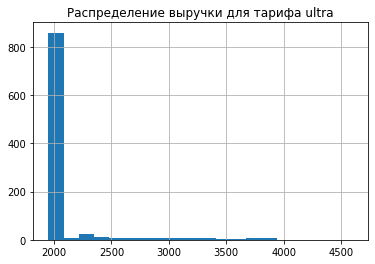

In [96]:
final_df_wo[final_df_wo['tariff']=='ultra']['total_spend'].hist(bins=20)
plt.title('Распределение выручки для тарифа ultra')

Text(0.5, 1.0, 'Распределение выручки для тарифа smart')

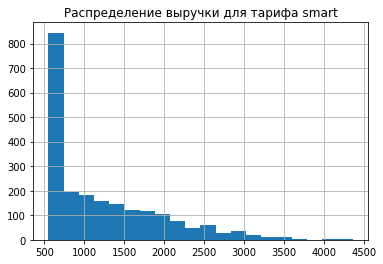

In [97]:
final_df_wo[final_df_wo['tariff']=='smart']['total_spend'].hist(bins=20)
plt.title('Распределение выручки для тарифа smart')

## Определим нулевую и альтернативную гипотезу
### H0: M(smart) = M(ultra)
### H1: M(smart) != M(ultra)
### p-value = 0.05

In [98]:
from scipy import stats as st
def ttest_for_samples(df1, df2):
    alpha = 0.05
    results = st.ttest_ind(df1,df2)
    if (results.pvalue < alpha):
        return(print("Отвергаем нулевую гипотезу c p-value:" ,results.pvalue))
    else:
        return(print("Не получилось отвергнуть нулевую гипотезу c p-value:" ,results.pvalue))

In [99]:
ultra = final_df_wo[final_df_wo['tariff']=='ultra']['total_spend']
smart = final_df_wo[final_df_wo['tariff']=='smart']['total_spend']
ttest_for_samples(ultra, smart)

Отвергаем нулевую гипотезу c p-value: 5.682085203088284e-217


In [100]:
print('Средняя выручка в тарифе smart:',round(smart.mean()),'р')
print('Средняя выручка в тарифе ultra:',round(ultra.mean()),'р')

Средняя выручка в тарифе smart: 1217.0 р
Средняя выручка в тарифе ultra: 2058.0 р


## Вывод: уверенно отвергаем H0, средние двух выборок не равны между собой. Средняя выручка в тарифе ultra больше, чем в тарифе smart

----
----

## Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Добавим колонку для группировки по региону

In [101]:
final_df_wo['region'] = np.where(final_df_wo.city == 'Москва', 'Москва', 'Другие')

In [102]:
#final_df_wo.city.unique()

### Сохраним выручку для Москвы и других регионов в отдельные переменные

In [103]:
msk = final_df_wo.query('region == "Москва"')['total_spend']
other = final_df_wo.query('region == "Другие"')['total_spend']

### Построим распределения

Text(0.5, 1.0, 'Распределение выручки для Москвы')

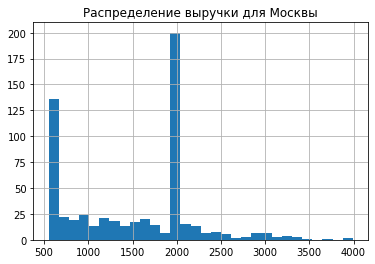

In [104]:
msk.hist(bins=30)
plt.title('Распределение выручки для Москвы')

Text(0.5, 1.0, 'Распределение выручки для других регионов')

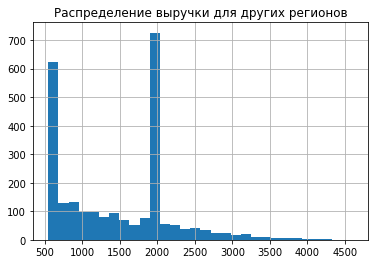

In [105]:
other.hist(bins=30)
plt.title('Распределение выручки для других регионов')

## Определим нулевую и альтернативную гипотезу
### H0: M(Москвы) = M(Других регионов)
### H1: M(Москвы) != M(Других регионов)
### p-value = 0.05
### b=20

In [106]:
ttest_for_samples(msk, other)

Не получилось отвергнуть нулевую гипотезу c p-value: 0.2941411633136976


In [107]:
print('Средняя выручка в Москве:',round(msk.mean()),'р')
print('Средняя выручка в других регионах:',round(other.mean()),'р')

Средняя выручка в Москве: 1506.0 р
Средняя выручка в других регионах: 1471.0 р


## Вывод: не можем отвергнуть H0, средние выручки в Москве и других регионах примерно равны между собой.

-----
-----

# Итоговые выводы:
### 1. Средняя выручка по тарифам не равна между собой
* Средняя выручка в тарифе smart: 1217.0 р
* Средняя выручка в тарифе ultra: 2058.0 р
* p-value: 5.682085203088284e-217, t statistic = 34,08

### 2. Средние выручки в Москве и других регионах примерно равны между собой
* Средняя выручка в Москве: 1506.0 р
* Средняя выручка в других регионах: 1471.0 р
* p-value: 0.2941411633136976

### 3. Использование интернета
* Пользователи тарифа smart обычно расходуют 16,5 гб/месяц
* Пользователи тарифа ultra 19,3 гб/месяц.


### 4. SMS-сообщения
* Пользователям тарифа smart обычно требуется 28 сообщений/месяц
* Пользователям тарифа ultra 37 сообщений/месяц


### 5. Количество минут
* Пользователям тарифа smart обычно требуется 421 мин/месяц
* Пользователям тарифа ultra 518 мин/месяц